![title](iris-flower.webp)

## 📚 Importing Libraries 📚

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , classification_report ,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

## ⏳ Exploring Dataset ⏳

In [4]:
df = pd.read_csv(r'IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 🧠 Understanding Data 🧠

In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

sepal_length: Length of the sepal

sepal_width: Width of the sepal

petal_length: Length of the petal

petal_width: Width of the petal

species: Name of the species of the flower

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Rename the species name

In [12]:
df['species'] = df['species'].str.replace('Iris-', '')

In [13]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

#  📊 Data Visualization 📊

##  Univariate Analysis

### ** Species **

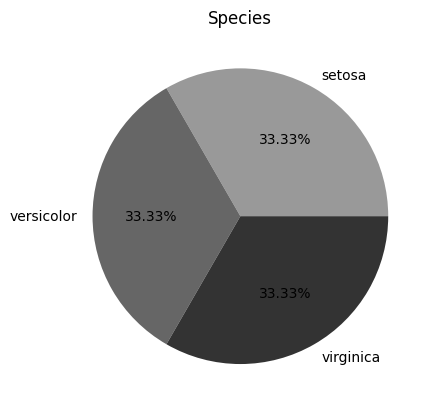

In [15]:
colors = ['#999999', '#666666', '#333333'] 
df['species'].value_counts().plot(kind='pie', autopct='%0.2f%%', ylabel='', title='Species', colors=colors)
plt.show()

### ** Sepal Length ** 

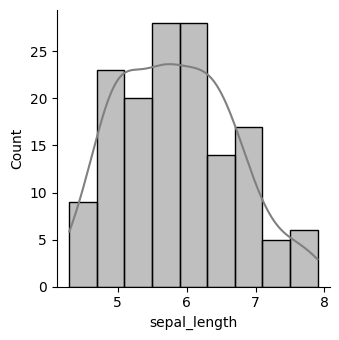

Mean: 5.843333333333334
Median: 5.8
Mode: 5.0


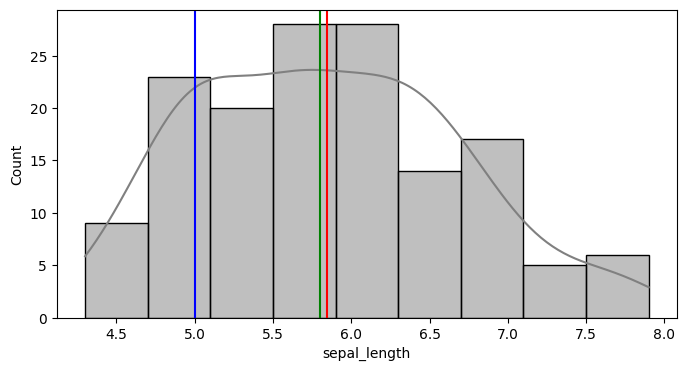

In [30]:
sns.displot(data=df, x='sepal_length', kde=True, color='grey', height=3.5)
plt.show()
plt.figure(figsize=(8, 4))
sns.histplot(df['sepal_length'], kde=True, color='grey')
plt.axvline(df['sepal_length'].mean(), color='red')
plt.axvline(df['sepal_length'].median(), color='green')
plt.axvline(df['sepal_length'].mode()[0], color='blue')
print('Mean:', df['sepal_length'].mean())
print('Median:', df['sepal_length'].median())
print('Mode:', df['sepal_length'].mode()[0])
plt.show()

## ** Sepal Width **

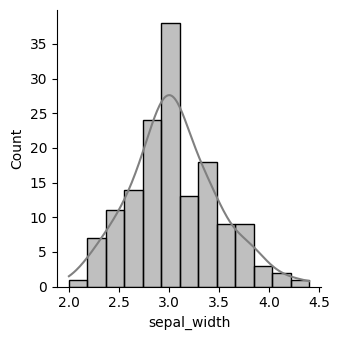

In [20]:
sns.displot(data=df, x='sepal_width', kde=True, color='grey', height=3.5)
plt.show()

### ** Petal Length **

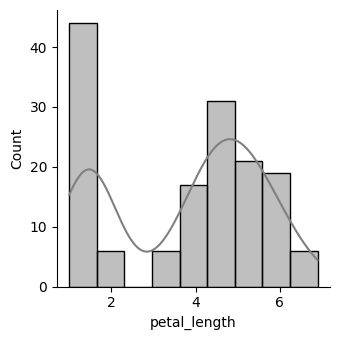

In [21]:
sns.displot(data=df, x='petal_length', kde=True, color='grey', height=3.5)
plt.show()

### ** Petal Width **

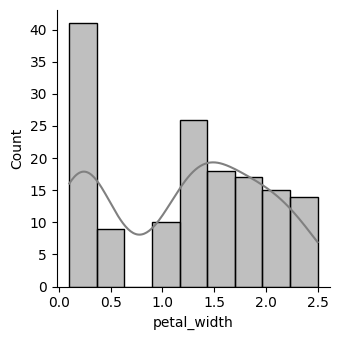

In [22]:
sns.displot(data=df, x='petal_width', kde=True, color='grey', height=3.5)
plt.show()

##  Bivariate Analysis

### ** Sepal Width with Species **

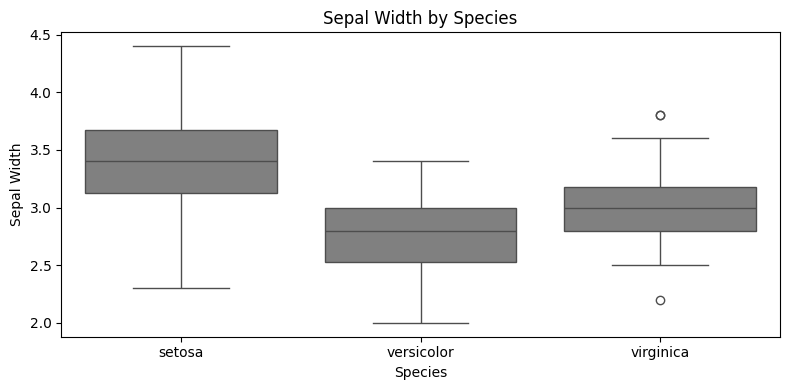

In [35]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='species', y='sepal_width', color='grey')
plt.title('Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width')
plt.tight_layout()
plt.show()

### ** Sepal length with Species **

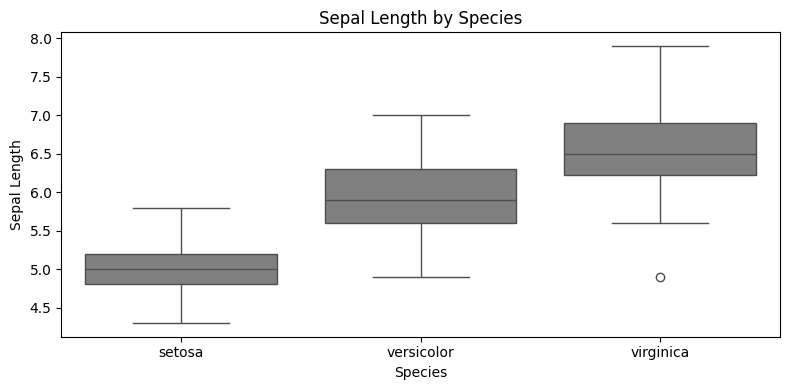

In [36]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='species', y='sepal_length', color='grey')
plt.title('Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length')

plt.tight_layout()
plt.show()

### ** Petal Width with Species **

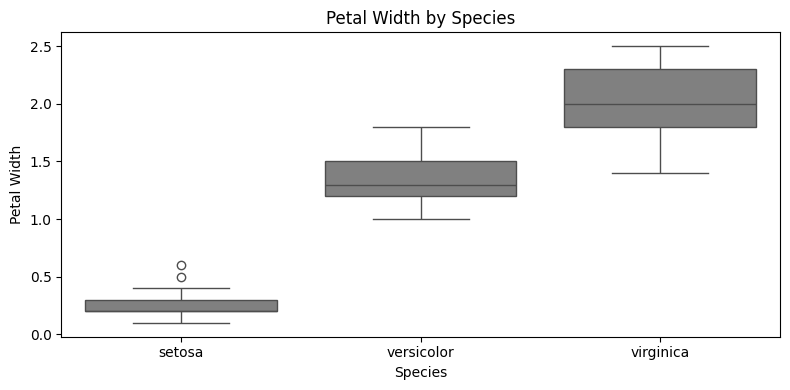

In [38]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='species', y='petal_width', color='grey')
plt.title('Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.show()

### ** Petal Length with Species **

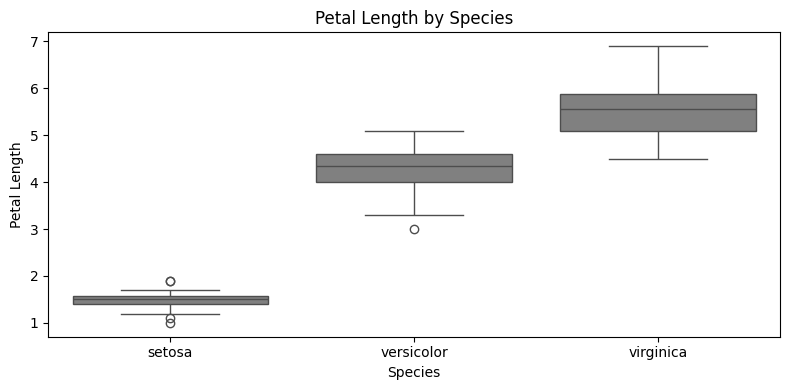

In [39]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='species', y='petal_length', color = 'grey')
plt.title('Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length')

plt.tight_layout()
plt.show()

## Multivariate Analysis

### ** Sepal Length , Sepal Width with Species **

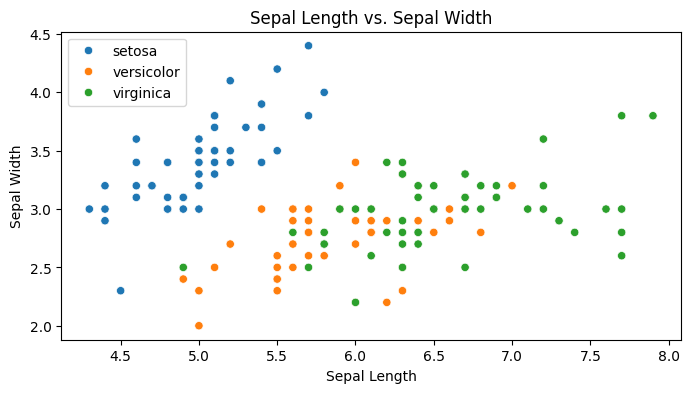

In [43]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

### ** Petal Length v/s Petal Width with Species **

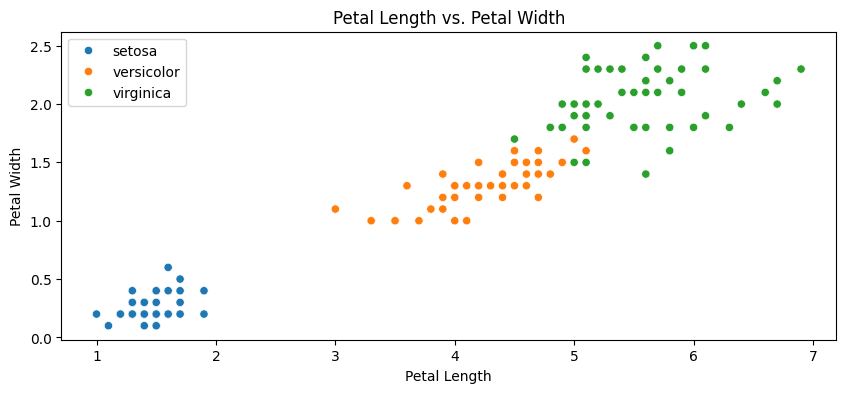

In [44]:
plt.figure(figsize=(10, 4))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

## ⚙️ Data Preprocessing ⚙️

In data preprocessing, we will perform:

1. Check for outliers
2. Check for correlation
3. Apply One Hot Encoding to target column
4. Apply standard scaling
5. Split data in train and test

#### Check Outliers:

In [45]:
def outliers_box(d_f,col_):
    q1 = np.quantile(d_f[col_],.25)
    q2 = np.quantile(d_f[col_],.75)
    iqr = q2-q1
    maxima_ = q2 + 1.5*iqr
    minima_ = q1 - 1.5*iqr
    
    if((d_f[col_].max() > maxima_) or (d_f[col_].min() < minima_)):
        print(col_,'------- outliers present')
    else:
        print(col_,'------- outliers not present')
        
    return(minima_,maxima_)

In [46]:
def out_remove(d_f,col_):
    x1,y1 = outliers_box(d_f,col_)
    df.drop(index= d_f[(d_f[col_]<x1) | (d_f[col_]>y1)].index, axis = 0, inplace =True)

In [47]:
df_num = df.select_dtypes(exclude = 'object')
for i in df_num.columns:
    out_remove(df,i)
    df.reset_index(drop=True,inplace = True)

sepal_length ------- outliers not present
sepal_width ------- outliers present
petal_length ------- outliers not present
petal_width ------- outliers not present


In [48]:
df.shape

(146, 5)

#### Check Correlation:

In [49]:
df_num.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


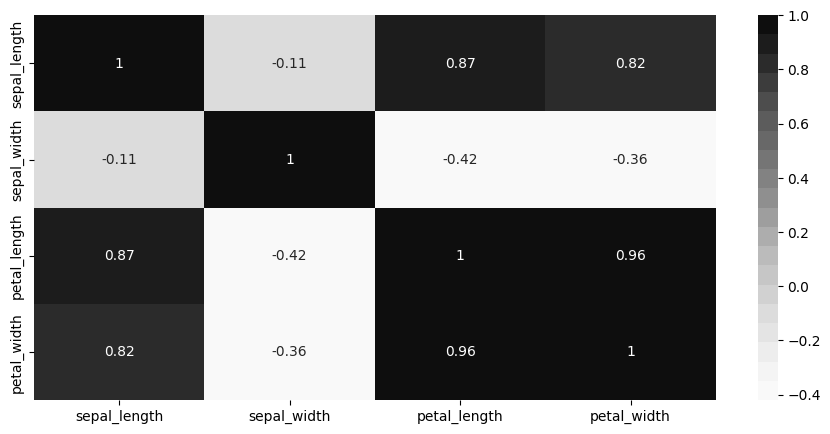

In [51]:
gray_palette = sns.color_palette('Greys', n_colors=20)
plt.figure(figsize=(11, 5))
sns.heatmap(df_num.corr(), annot=True, cmap=gray_palette)
plt.show()

### Apply Label Encoding to the target 

In [53]:
le = LabelEncoder() 
df['species'] = le.fit_transform(df['species']) 
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.7,3.0,5.2,2.3,2
142,6.3,2.5,5.0,1.9,2
143,6.5,3.0,5.2,2.0,2
144,6.2,3.4,5.4,2.3,2


### Standard Scaling:

In [56]:
scale = df.drop('species', axis = 1)
ss = StandardScaler()
scaled_data = ss.fit_transform(scale)
scaled_df = pd.DataFrame(scaled_data, columns = scale.columns)
scaled_df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,-0.910515,1.175789,-1.374878,-1.345899
1,-1.151122,-0.093924,-1.374878,-1.345899
2,-1.391729,0.413961,-1.431986,-1.345899
3,-1.512032,0.160019,-1.317771,-1.345899
4,-1.030819,1.429732,-1.374878,-1.345899


## ✍🏻 PREPARE THE DATA FOR ALGORITHMES ✍🏻

In [57]:
X = scaled_df
y = df['species']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=True,random_state=42)

## Logistic Regression 📝

In [61]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [67]:
y_pred_lr__train=clf.predict(X_train)
print(classification_report(y_train,y_pred_lr__train))
score=accuracy_score(y_train,y_pred_lr__train)
print(f'Accuracy: {round(score*100,2)}%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.95      0.95      0.95        38
           2       0.94      0.94      0.94        34

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102

Accuracy: 96.08%


In [68]:
y_pred_lr=clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[17  0  0]
 [ 0 10  1]
 [ 0  0 16]]


In [69]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.91      0.95        11
           2       0.94      1.00      0.97        16

    accuracy                           0.98        44
   macro avg       0.98      0.97      0.97        44
weighted avg       0.98      0.98      0.98        44



In [70]:
score=accuracy_score(y_test,y_pred_lr)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 97.73%


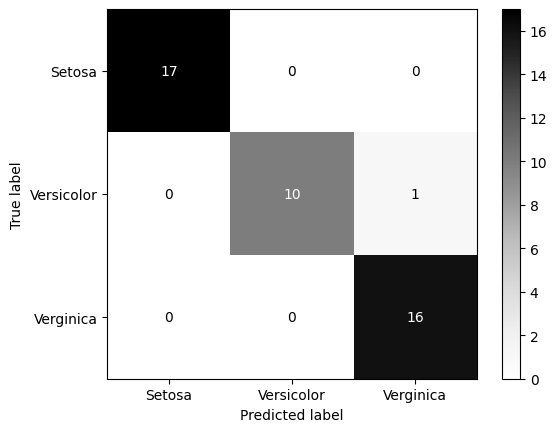

In [77]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
cmap = sns.color_palette("Greys", as_cmap=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Setosa', 'Versicolor', 'Verginica'])
disp.plot(cmap=cmap)
plt.show()

## Decision Tree📝

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV as gscv

In [92]:
modele_arbre_decision = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = 5 ,min_samples_leaf = 2,min_samples_split= 3,random_state=42)
modele_arbre_decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3, random_state=42)

In [93]:
y_pred_dt = modele_arbre_decision.predict(X_test)
ypred_dt_train = modele_arbre_decision.predict(X_train)

In [94]:
cm_nb = confusion_matrix(y_test, y_pred_dt)
print(cm_nb)

[[17  0  0]
 [ 0 10  1]
 [ 0  1 15]]


In [95]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        16

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44



In [96]:
score_rf=accuracy_score(y_test,y_pred_dt)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 95.45%


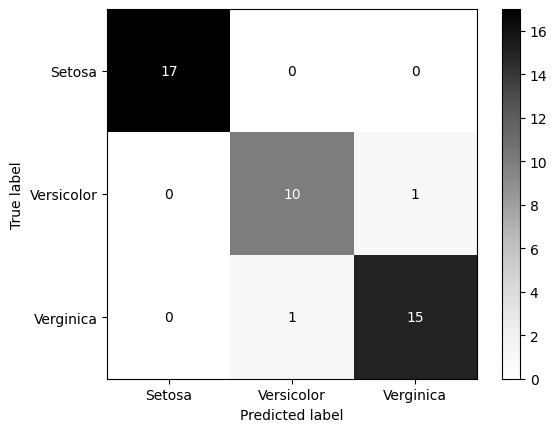

In [97]:
cm_nb = confusion_matrix(y_test, y_pred_dt)
cmap = sns.color_palette("Greys", as_cmap=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Setosa', 'Versicolor', 'Verginica'])
disp.plot(cmap=cmap)
plt.show()

## KNN 📝 

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [99]:
y_pred_knn = knn.predict(X_test)
ypred_knn_train = knn.predict(X_train)

In [100]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[17  0  0]
 [ 0 10  1]
 [ 0  2 14]]


In [101]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.83      0.91      0.87        11
           2       0.93      0.88      0.90        16

    accuracy                           0.93        44
   macro avg       0.92      0.93      0.92        44
weighted avg       0.93      0.93      0.93        44



In [102]:
score_rf=accuracy_score(y_test,y_pred_knn)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 93.18%


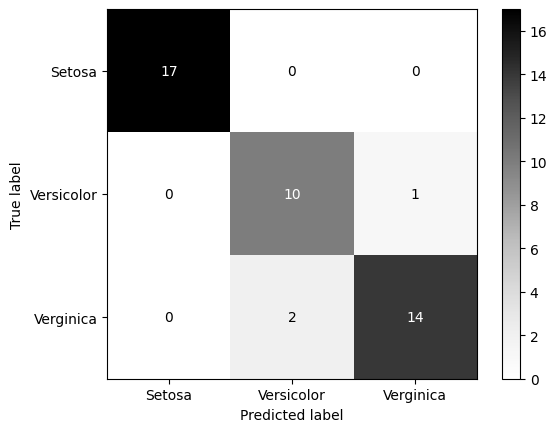

In [103]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cmap = sns.color_palette("Greys", as_cmap=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Setosa', 'Versicolor', 'Verginica'])
disp.plot(cmap=cmap)
plt.show()

 ## XGBoost 📝

In [107]:
xg=xgb.XGBClassifier(random_state=42,n_estimators=50)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [108]:
y_pred_xg = xg.predict(X_test)
ypred_xg_train = xg.predict(X_train)

In [109]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
print(cm_xg)

[[17  0  0]
 [ 0 10  1]
 [ 0  1 15]]


In [110]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.91      0.91      0.91        11
           2       0.94      0.94      0.94        16

    accuracy                           0.95        44
   macro avg       0.95      0.95      0.95        44
weighted avg       0.95      0.95      0.95        44



In [111]:
score_rf=accuracy_score(y_test,y_pred_xg)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 95.45%


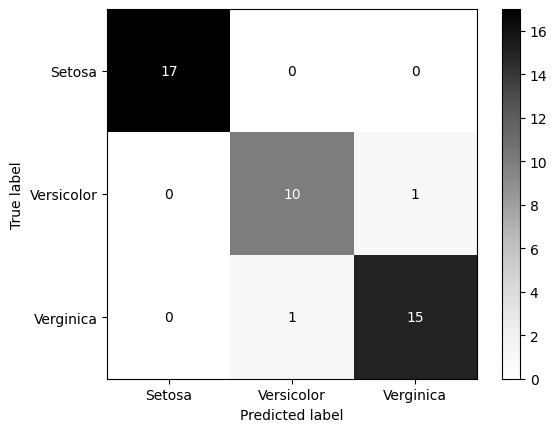

In [112]:
cm_xg = confusion_matrix(y_test, y_pred_xg)
cmap = sns.color_palette("Greys", as_cmap=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xg, display_labels=['Setosa', 'Versicolor', 'Verginica'])
disp.plot(cmap=cmap)
plt.show()

 ## SVM 📝

In [114]:
svm = SVC()
model_svm = svm.fit(X_train, y_train)
model_svm

SVC()

In [115]:
y_pred_svm = model_svm.predict(X_test)
ypred_svm_train = model_svm.predict(X_train)

In [116]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

[[17  0  0]
 [ 0 11  0]
 [ 0  1 15]]


In [117]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.92      1.00      0.96        11
           2       1.00      0.94      0.97        16

    accuracy                           0.98        44
   macro avg       0.97      0.98      0.97        44
weighted avg       0.98      0.98      0.98        44



In [118]:
score_rf=accuracy_score(y_test,y_pred_svm)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 97.73%


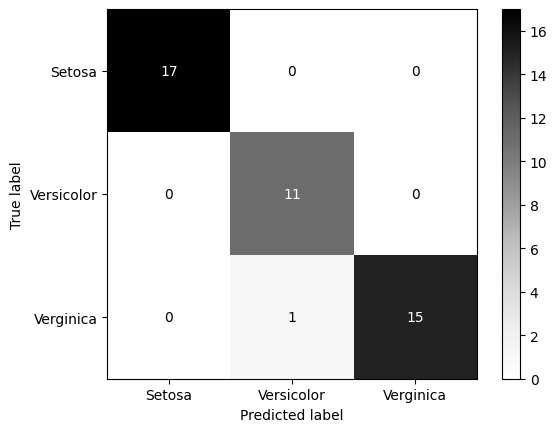

In [119]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
cmap = sns.color_palette("Greys", as_cmap=True)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Setosa', 'Versicolor', 'Verginica'])
disp.plot(cmap=cmap)
plt.show()

### Score Card 

In [120]:
df_scorecard = pd.DataFrame(columns = ['Model_name', 'Accuracy_Score_train', 'Precision_Score_train', 'Recall_Score_train', 'F1_Score_train', 'Accuracy_Score_test', 'Precision_Score_test', 'Recall_Score_test', 'F1_Score_test'])
df_scorecard

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test


In [121]:
def score_card(d_f, model_name, y_pred, y_test, x_pred, y_train):
    metrics_dict = {
        'Model_name': model_name,
        'Accuracy_Score_train': accuracy_score(y_train, x_pred),
        'Precision_Score_train': precision_score(y_train, x_pred, average='macro'),
        'Recall_Score_train': recall_score(y_train, x_pred, average='macro'),
        'F1_Score_train': f1_score(y_train, x_pred, average='macro'),
        'Accuracy_Score_test': accuracy_score(y_test, y_pred),
        'Precision_Score_test': precision_score(y_test, y_pred, average='macro'),
        'Recall_Score_test': recall_score(y_test, y_pred, average='macro'),
        'F1_Score_test': f1_score(y_test, y_pred, average='macro')
    }

    dfx = pd.concat([d_f, pd.DataFrame(metrics_dict, index=[0])], ignore_index=True)
    return dfx

In [124]:
df101 = score_card(df_scorecard, 'Logistic Regression ', y_pred_lr, y_test, y_pred_lr__train, y_train)
df102 = score_card(df101, 'Decision Tree ', y_pred_dt, y_test, ypred_dt_train, y_train)
df103 = score_card(df102, 'KNN ', y_pred_knn, y_test, ypred_knn_train, y_train)
df104 = score_card(df103, 'XGBoost ', y_pred_xg, y_test, ypred_xg_train, y_train)
df105 = score_card(df104, 'SVM ', y_pred_svm, y_test, ypred_svm_train, y_train)
df105

,Model_name,Accuracy_Score_train,Precision_Score_train,Recall_Score_train,F1_Score_train,Accuracy_Score_test,Precision_Score_test,Recall_Score_test,F1_Score_test
0,Logistic Regression,0.960784,0.962848,0.962848,0.962848,0.977273,0.980392,0.969697,0.974026
1,Decision Tree,0.980392,0.983333,0.980392,0.981352,0.954545,0.948864,0.948864,0.948864
2,KNN,0.950980,0.957063,0.950705,0.953051,0.931818,0.922222,0.928030,0.924264
3,XGBoost,1.000000,1.000000,1.000000,1.000000,0.954545,0.948864,0.948864,0.948864
4,SVM,0.970588,0.971943,0.972652,0.972174,0.977273,0.972222,0.979167,0.974755


![title](end1.jpg)